## 문제. p⨁q 는 배타적 연산자(Exclusive OR or XOR)로 두 입력값이 서로 다를 때만 참이 되는 특징을 가지고 있다. 즉, p⨁q=(p∨q)∧~( p∧q) 로 표현할 수 있다고 한다. 이를 진리표(truth table)를 이용하여 살펴보아라. 

In [6]:
# p∧q 의 진리표
import pandas as pd
from sympy import symbols, And

# 변수 정의
P, Q = symbols('P Q')

# And 연산을 포함한 진리표 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result = And(p_val, q_val)  
        truth_values.append([p_val, q_val, result])

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "P ∧ Q"])
df

,P,Q,P ∧ Q
0,True,True,True
1,True,False,False
2,False,True,False
3,False,False,False


In [9]:
# p V q 의 진리표
from sympy import symbols, Or
from sympy.logic.boolalg import truth_table

# 변수 정의
P, Q = symbols('P Q')

# 논리식 정의 (P ∨ Q)
expr = Or(P, Q)

# 진리표 생성
for row in truth_table(expr, [P, Q]):
    print(row)  # 각 행을 출력


([0, 0], False)
([0, 1], True)
([1, 0], True)
([1, 1], True)


In [2]:
import pandas as pd
from sympy import symbols, Xor

# 변수 정의
P, Q = symbols('P Q')

# XOR 연산을 포함한 진리표 생성
truth_values_xor = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result = Xor(p_val, q_val)  # P ⊕ Q (Exclusive OR 연산)
        truth_values_xor.append([p_val, q_val, result])

# 데이터프레임 변환
df_xor = pd.DataFrame(truth_values_xor, columns=["P", "Q", "P ⊕ Q"])
df_xor

,P,Q,P ⊕ Q
0,True,True,False
1,True,False,True
2,False,True,True
3,False,False,False


In [4]:
import pandas as pd
from sympy import symbols, Or, And, Not

# 변수 정의
P, Q = symbols('P Q')

# 논리식 정의: (P ∨ Q) ∧ ~(P ∧ Q)
expr = And(Or(P, Q), Not(And(P, Q)))

# 진리표 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result = expr.subs({P: p_val, Q: q_val})  # 값 대입 후 평가
        truth_values.append([p_val, q_val, result])

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "(P ∨ Q) ∧ ~(P ∧ Q)"])
df

,P,Q,(P ∨ Q) ∧ ~(P ∧ Q)
0,True,True,False
1,True,False,True
2,False,True,True
3,False,False,False


## 문제.	( p∧q) ∨~r 에 대한 진리표를 작성해 보아라. 

In [1]:
import pandas as pd
from sympy import symbols, Or, And, Not

# 변수 정의
p, q, r = symbols('p q r')

# 논리식 정의: ( p∧q) ∨~r
expr = Or(And(p,q),Not(r))

# 진리표 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        for r_val in [True, False]:
            result = expr.subs({p: p_val, q: q_val, r:r_val})  
            truth_values.append([p_val, q_val, r_val,result])

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["p", "q", "r", "(p∧q)∨~r"])
df

,p,q,r,(p∧q)∨~r
0,True,True,True,True
1,True,True,False,True
2,True,False,True,False
3,True,False,False,True
4,False,True,True,False
5,False,True,False,True
6,False,False,True,False
7,False,False,False,True


## 문제. 	~( p∧q)≡ ~p ∨ ~q 임을 보여라.

In [6]:
import pandas as pd
from sympy import symbols, Not, And, Or

# 변수 정의
P, Q = symbols('P Q')

# 논리식 정의
expr1 = Not(And(P, Q))  # ~(P ∧ Q)
expr2 = Or(Not(P), Not(Q))  # ~P ∨ ~Q

# Truth Table 생성
truth_values = []
for p_val in [False, True]:
    for q_val in [False, True]:
        result1 = expr1.subs({P: p_val, Q: q_val})  # ¬(P ∧ Q) 결과
        result2 = expr2.subs({P: p_val, Q: q_val})  # ¬P ∨ ¬Q 결과
        # 마지막 열은 두 논리식이 같은지 확인
        truth_values.append([p_val, q_val, result1, result2, result1 == result2])  

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "~(P ∧ Q)", "~P ∨ ~Q", "동치 여부"])
df

,P,Q,~(P ∧ Q),~P ∨ ~Q,동치 여부
0,False,False,True,True,True
1,False,True,True,True,True
2,True,False,True,True,True
3,True,True,False,False,True


In [8]:
# ~( p∨q)≡ ~p∧~q 의 증명
# 논리식 정의
expr1 = Not(Or(P, Q))  # ¬(P ∨ Q)
expr2 = And(Not(P), Not(Q))  # ¬P ∧ ¬Q

# Truth Table 생성
truth_values = []
for p_val in [False, True]:
    for q_val in [False, True]:
        result1 = expr1.subs({P: p_val, Q: q_val})  # ~(P ∨ Q) 결과
        result2 = expr2.subs({P: p_val, Q: q_val})  # ~P ∧ ~Q 결과
        truth_values.append([p_val, q_val, result1, result2, result1 == result2])  

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "~(P ∨ Q)", "~P ∧ ~Q", "동치 여부"])
df

,P,Q,~(P ∨ Q),~P ∧ ~Q,동치 여부
0,False,False,True,True,True
1,False,True,False,False,True
2,True,False,False,False,True
3,True,True,False,False,True


## 문제. 	~p∨p 는 항상 참임을 보여라. 

In [9]:
# 논리식 정의: ~P ∨ P
expr = Or(Not(P), P)

# Truth Table 생성
truth_values = []
for p_val in [False, True]:
    result = expr.subs({P: p_val})  # ¬P ∨ P 결과 계산
    truth_values.append([p_val, result])

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "~P ∨ P"])
df

,P,~P ∨ P
0,False,True
1,True,True


In [11]:
# 흡수법칙 
from sympy import symbols, Or, And, simplify_logic

# 변수 정의
P, Q = symbols('P Q')

# 논리식: P ∨ (P ∧ Q)
expr = Or(P, And(P, Q))

# 논리식 단순화
simplified_expr = simplify_logic(expr)
simplified_expr

P

## 문제. ~ (~p∧q)∧(p∨q)를 간단히 표현해 보아라.  

In [21]:
from sympy import symbols, Or, And, simplify_logic

# 변수 정의
P, Q = symbols('P Q')

# 논리식: P ∨ (P ∧ Q)
expr =And(Not(And(Not(P),Q)),Or(P,Q))

# 논리식 단순화
simplified_expr = simplify_logic(expr)
simplified_expr

P

## 문제. 	p→q 의 진리표를 작성해 보아라. 

In [14]:
# 조건명제 (Implication) P → Q의 진리표 생성

from sympy import Implies

# 논리식 정의: P → Q (조건명제)
expr = Implies(P, Q)

# Truth Table 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result = expr.subs({P: p_val, Q: q_val})  # P → Q 결과 계산
        truth_values.append([p_val, q_val, result])

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "P → Q"])
df

,P,Q,P → Q
0,True,True,True
1,True,False,False
2,False,True,True
3,False,False,True


In [16]:
# 논리식 정의: ~P ∨ Q
expr = Or(Not(P), Q)

# Truth Table 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result = expr.subs({P: p_val, Q: q_val})  # ¬P ∨ Q 결과 계산
        truth_values.append([p_val, q_val, result])

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "~P ∨ Q"])
df

,P,Q,~P ∨ Q
0,True,True,True
1,True,False,False
2,False,True,True
3,False,False,True


## 문제. 	(p∨q)→r≡(p→q)∧(p→r) 임을 보여라. 

In [23]:
# (p ∨ q) → r 의 진리표
# 변수 정의
p, q, r = symbols('p q r')

# 논리식 정의: (p ∨ q) → r
expr = Implies(Or(p, q), r)

# 진리표 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        for r_val in [True, False]:
            result = expr.subs({p: p_val, q: q_val, r:r_val})  
            truth_values.append([p_val, q_val, r_val,result])

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["p", "q", "r", "(p ∨ q) → r"])
df

,p,q,r,(p ∨ q) → r
0,True,True,True,True
1,True,True,False,False
2,True,False,True,True
3,True,False,False,False
4,False,True,True,True
5,False,True,False,False
6,False,False,True,True
7,False,False,False,True


In [26]:
# 논리식 정의: (p→q)∧(p→r)
expr =And(Implies(p,r),Implies(q,r))

# 진리표 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        for r_val in [True, False]:
            result = expr.subs({p: p_val, q: q_val, r:r_val})  
            truth_values.append([p_val, q_val, r_val,result])

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["p", "q", "r", "(p→q)∧(p→r)"])
df

,p,q,r,(p→q)∧(p→r)
0,True,True,True,True
1,True,True,False,False
2,True,False,True,True
3,True,False,False,False
4,False,True,True,True
5,False,True,False,False
6,False,False,True,True
7,False,False,False,True


## 문제. 	‘$n^2$ 이 홀수라면 $n$ 이 홀수이다. ‘ 라는 명제를 증명해 보아라.  

In [19]:
# 필요한 라이브러리 다시 불러오기
import pandas as pd
from sympy import symbols, Implies, Not

# 변수 정의
P, Q = symbols('P Q')

# 논리식 정의: P → Q 와 ~Q → ~P
expr1 = Implies(P, Q)  # P → Q
expr2 = Implies(Not(Q), Not(P))  # ~Q → ~P

# Truth Table 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result1 = expr1.subs({P: p_val, Q: q_val})  # P → Q 결과 계산
        result2 = expr2.subs({P: p_val, Q: q_val})  # ~Q → ~P 결과 계산
        truth_values.append([p_val, q_val, result1, result2, result1 == result2])  

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "P → Q", "~Q → ~P", "동치 여부"])
df

,P,Q,P → Q,~Q → ~P,동치 여부
0,True,True,True,True,True
1,True,False,False,False,True
2,False,True,True,True,True
3,False,False,True,True,True


## 문제. p↔q≡(p→q) ∧(q→p) 임을 보여라. 

In [2]:
from sympy import symbols, Equivalent, Implies, And
import pandas as pd

# 변수 정의
P, Q = symbols('P Q')

# 논리식 정의: p↔q
expr1 = Equivalent(P, Q)  #  p↔q
expr2 = And(Implies(P,Q),Implies(Q,P))  # (p→q) ∧(q→p)

# Truth Table 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result1 = expr1.subs({P: p_val, Q: q_val})  # P → Q 결과 계산
        result2 = expr2.subs({P: p_val, Q: q_val})  # ~Q → ~P 결과 계산
        truth_values.append([p_val, q_val, result1, result2, result1 == result2])  

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", " p↔q", "~(p→q) ∧(q→p)", "동치 여부"])
df

,P,Q,p↔q,~(p→q) ∧(q→p),동치 여부
0,True,True,True,True,True
1,True,False,False,False,True
2,False,True,False,False,True
3,False,False,True,True,True


## 문제.	‘외대생이면 경영수학을 수강하거나 퀴즈를 보지 않는다. 경영수학 수강생은 외대생이면서 퀴즈를 본다. 따라서, 외대생은 퀴즈를 본다.’ 라는 논증은 정당(valid)한가?

In [2]:
# p→(q∨~r),q→(p∧r)   ∴p→r
from sympy import symbols, Implies, And, Or, Not
import pandas as pd

# 변수 정의
p, q, r = symbols('p q r')

# 논리식 정의: (p ∨ q) → r
expr1 = Implies(p,Or(q,Not(r)))
expr2 = Implies(q,And(p,r))
expr3 = Implies(p,r)

# 진리표 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        for r_val in [True, False]:
            result1 = expr1.subs({p: p_val, q: q_val, r:r_val})  
            result2 = expr2.subs({p: p_val, q: q_val, r:r_val})
            result3 = expr3.subs({p: p_val, q: q_val, r:r_val})
            truth_values.append([p_val, q_val, r_val,result1,result2,result3])
            

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["p", "q", "r", "p→(q∨~r)", "q→(p∧r)","p→r"])
df

,p,q,r,p→(q∨~r),q→(p∧r),p→r
0,True,True,True,True,True,True
1,True,True,False,True,False,False
2,True,False,True,False,True,True
3,True,False,False,True,True,False
4,False,True,True,True,False,True
5,False,True,False,True,False,True
6,False,False,True,True,True,True
7,False,False,False,True,True,True


## 문제. ‘371,487의 각 자리의 숫자의 합이 3으로 나누어지면, 371,487은 3의 배수이다. 371,487의 각 자리의 숫자의 합은 3으로 나누어진다. 따라서 371,487은 3의 배수이다.’ 라는 논증은 정당(valid)한가?

In [3]:
# modus ponens
from sympy import symbols, Equivalent, Implies, And
import pandas as pd

# 변수 정의
P, Q = symbols('P Q')

# 논리식 정의
expr1 = Implies(P, Q)  
expr2 = P
expr3 = Q

# Truth Table 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result1 = expr1.subs({P: p_val, Q: q_val})  
        result2 = expr2.subs({P: p_val, Q: q_val})  
        result3 = expr3.subs({P: p_val, Q: q_val})  
        truth_values.append([p_val, q_val, result1, result2, result3])  

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "P→Q","P","Q"])
df

,P,Q,P→Q,P,Q
0,True,True,True,True,True
1,True,False,False,True,False
2,False,True,True,False,True
3,False,False,True,False,False


In [5]:
# modus tollens
from sympy import symbols, Implies, Not
import pandas as pd

# 변수 정의
P, Q = symbols('P Q')

# 논리식 정의
expr1 = Implies(P, Q)  
expr2 = Not(Q)
expr3 = Not(P)

# Truth Table 생성
truth_values = []
for p_val in [True, False]:
    for q_val in [True, False]:
        result1 = expr1.subs({P: p_val, Q: q_val})  
        result2 = expr2.subs({P: p_val, Q: q_val})  
        result3 = expr3.subs({P: p_val, Q: q_val})  
        truth_values.append([p_val, q_val, result1, result2, result3])  

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["P", "Q", "P→Q","~Q","~P"])
df

,P,Q,P→Q,~Q,~P
0,True,True,True,False,False
1,True,False,False,True,False
2,False,True,True,False,True
3,False,False,True,True,True


## S→B, ~( A→B) 의 진리표 만들기

In [1]:
from sympy import symbols, Implies, Not, And
import pandas as pd

# 변수 정의
A, B, S = symbols('A B S')

# 논리식 정의
expr1 = Implies(S,B)
expr2 = Not(Implies(A,B))

# 진리표 생성
truth_values = []
for a_val in [True, False]:
    for b_val in [True, False]:
        for s_val in [True, False]:
            result1 = expr1.subs({A: a_val, B: b_val, S:s_val})  
            result2 = expr2.subs({A: a_val, B: b_val, S:s_val})
            result3 = And(result1,result2)
            truth_values.append([a_val, b_val, s_val,result1,result2, result3])
            

# 데이터프레임 변환
df = pd.DataFrame(truth_values, columns=["A", "B", "S", "S→B)", "~(A→B)",'conclusion'])
df

,A,B,S,S→B),~(A→B),conclusion
0,True,True,True,True,False,False
1,True,True,False,True,False,False
2,True,False,True,False,True,False
3,True,False,False,True,True,True
4,False,True,True,True,False,False
5,False,True,False,True,False,False
6,False,False,True,False,False,False
7,False,False,False,True,False,False


## 문제. 아래 글을 읽고, “모든 학생 S에 대해, 그리고 모든 음식 스테이션 Z에 대해, Z에 포함된 최소한 하나의 음식 I가 존재하여 S가 그 음식을 선택했다’는 명제가 참인지 판단하여라.  
A college cafeteria line has four stations: salads, main courses, desserts, and beverages.
The salad station offers a choice of green salad or fruit salad; the main course station
offers spaghetti or fish; the dessert station offers pie or cake; and the beverage station
offers milk, soda, or coffee. Three students, Uta, Tim, and Yuen, go through the line and
make the following choices:

Uta: green salad, spaghetti, pie, milk

Tim: fruit salad, fish, pie, cake, milk, coffee

Yuen: spaghetti, fish, pie, soda


In [10]:
# 각 스테이션에 제공되는 음식
stations = {
    "salads": {"green salad", "fruit salad"},
    "main_courses": {"spaghetti", "fish"},
    "desserts": {"pie", "cake"},
    "beverages": {"milk", "soda", "coffee"}
}

# 각 학생의 음식 선택
students = {
    "Uta": {"green salad", "spaghetti", "pie", "milk"},
    "Tim": {"fruit salad", "fish", "pie", "cake", "milk", "coffee"},
    "Yuen": {"spaghetti", "fish", "pie", "soda"}
}


In [11]:
# 각 학생이 고른 선택을 출력해 봄
for student, choices in students.items():
    print(student,choices)

Uta {'green salad', 'pie', 'spaghetti', 'milk'}
Tim {'pie', 'milk', 'fish', 'cake', 'coffee', 'fruit salad'}
Yuen {'fish', 'pie', 'spaghetti', 'soda'}


In [6]:
for student, choices in students.items():  # ∀ S (모든 학생)
    for station, items in stations.items():  # ∀ Z (모든 스테이션)
        if any(item in choices for item in items):  # ∃ I (해당 스테이션에서 선택된 음식이 있는 경우)
            print(f"❌ {student} chose {items} in {station}")

❌ Uta chose {'green salad', 'fruit salad'} in salads
❌ Uta chose {'fish', 'spaghetti'} in main_courses
❌ Uta chose {'pie', 'cake'} in desserts
❌ Uta chose {'milk', 'coffee', 'soda'} in beverages
❌ Tim chose {'green salad', 'fruit salad'} in salads
❌ Tim chose {'fish', 'spaghetti'} in main_courses
❌ Tim chose {'pie', 'cake'} in desserts
❌ Tim chose {'milk', 'coffee', 'soda'} in beverages
❌ Yuen chose {'fish', 'spaghetti'} in main_courses
❌ Yuen chose {'pie', 'cake'} in desserts
❌ Yuen chose {'milk', 'coffee', 'soda'} in beverages


In [8]:
for student, choices in students.items():  # ∀ S (모든 학생)
    for station, items in stations.items():  # ∀ Z (모든 스테이션)
        if all(item in choices for item in items):  # ∀ I (해당 스테이션에서 모든 음식을 선택한 경우)
            print(f"❌ {student} chose {items} in {station}")

❌ Tim chose {'pie', 'cake'} in desserts
❌ Yuen chose {'fish', 'spaghetti'} in main_courses


In [9]:
for student, choices in students.items():  # ∀ S (모든 학생)
    for station, items in stations.items():  # ∀ Z (모든 스테이션)
        if not all(item in choices for item in items):  # ∀ I (해당 스테이션에서 모든 음식을 선택하지 않은 경우)
            print(f"❌ {student} chose {items} in {station}")

❌ Uta chose {'green salad', 'fruit salad'} in salads
❌ Uta chose {'fish', 'spaghetti'} in main_courses
❌ Uta chose {'pie', 'cake'} in desserts
❌ Uta chose {'milk', 'coffee', 'soda'} in beverages
❌ Tim chose {'green salad', 'fruit salad'} in salads
❌ Tim chose {'fish', 'spaghetti'} in main_courses
❌ Tim chose {'milk', 'coffee', 'soda'} in beverages
❌ Yuen chose {'green salad', 'fruit salad'} in salads
❌ Yuen chose {'pie', 'cake'} in desserts
❌ Yuen chose {'milk', 'coffee', 'soda'} in beverages


In [12]:
for student, choices in students.items():  # ∀ S (모든 학생)
    for station, items in stations.items():  # ∀ Z (모든 스테이션)
        if not any(item in choices for item in items):  # ∃ I (해당 스테이션에서 선택된 음식이 없는 경우)
            print(f"❌ {student} did not choose anything from {station}")

❌ Yuen did not choose anything from salads


In [ ]:
def check_formula(students, stations):
    for student, choices in students.items():  # ∀ S (모든 학생)
        for station, items in stations.items():  # ∀ Z (모든 스테이션)
            if not any(item in choices for item in items):  # ∃ I (해당 스테이션에서 선택된 음식이 없는 경우)
                print(f"❌ {student} did not choose anything from {station}")
                return False  # 논리식이 거짓이므로 False 반환
    return True  # 모든 학생이 조건을 만족하면 True 반환

# 논리식 실행
result = check_formula(students, stations)ㅠㅠ

# 결과 출력
if result:
    print("✅ The statement ∀S, ∀Z, ∃I in Z such that S chose I is TRUE.")
else:
    print("❌ The statement is FALSE.")

## 문제. 홀수 n에 대하여 아래의 식이 성립함을 증명하여라. 
  $$ 1^3+3^3+5^3+⋯+(2n-1)^3=n^2 (2n^2-1) $$


In [1]:
import sympy as sp

# 변수 정의
k = sp.symbols('k')

# 주어진 식
expr = k**2 * (2*k**2 - 1) + (2*k + 1)**3

# 식의 인수분해
sp.factor(expr)

(k + 1)**2*(2*k**2 + 4*k + 1)

## 소인수 분해

In [2]:
# 소인수 분해
from sympy import factorint

factorint(120)

{2: 3, 3: 1, 5: 1}

In [4]:
def sieve_of_eratosthenes(limit):
    """에라토스테네스의 체를 사용하여 2부터 limit까지의 모든 소수를 찾는 함수"""
    primes = [True] * (limit + 1)  # 처음에는 모든 수를 소수(True)로 가정
    primes[0], primes[1] = False, False  # 0과 1은 소수가 아님

    for num in range(2, int(limit ** 0.5) + 1):  # 2부터 sqrt(limit)까지 반복
        if primes[num]:  # 현재 숫자가 소수라면
            for multiple in range(num * num, limit + 1, num):  # num의 배수들을 제거
                primes[multiple] = False

    # 소수 리스트 반환
    return [num for num, is_prime in enumerate(primes) if is_prime]

# 테스트: 100 이하의 모든 소수 찾기
prime_numbers = sieve_of_eratosthenes(10)

# 결과 출력
prime_numbers


[2, 3, 5, 7]

## floor 함수와 ceiling 함수

In [7]:
# floor 함수
from math import floor
import numpy as np
L=[-4.99999,-2.7,-np.sqrt(2),0.3,3.9,4.5]
for x in L:
    print(f'⌊{x}⌋=',floor(x))

⌊-4.99999⌋= -5
⌊-2.7⌋= -3
⌊-1.4142135623730951⌋= -2
⌊0.3⌋= 0
⌊3.9⌋= 3
⌊4.5⌋= 4


In [10]:
floor(3.5+2.6),floor(3.5)+floor(2.6)

(6, 5)

In [9]:
# ceiling 함수
from math import ceil
import numpy as np
L=[-4.99999,-2.7,-np.sqrt(2),0.3,3.9,4.5]
for x in L:
    print(f'⌈{x}⌉=',ceil(x))

⌈-4.99999⌉= -4
⌈-2.7⌉= -2
⌈-1.4142135623730951⌉= -1
⌈0.3⌉= 1
⌈3.9⌉= 4
⌈4.5⌉= 5


# Set Theory

## 문제. 아래 조건제시법으로 표시된 집합에서 진부분집합을 모두 나열해 보아라. 
## A={x∈"자연수"|x"는  8의 약수}" 

In [18]:
# 약수 구하는 함수
from sympy import divisors
divisors(8)

[1, 2, 4, 8]

In [17]:
# 원소의개수가 2개인 경우
from itertools import combinations
A={1,2,4,8}
S=list(A) # list형으로 변환
for subset in combinations(S,2):
    print(set(subset))

{1, 2}
{1, 3}
{1, 4}
{2, 3}
{2, 4}
{3, 4}


In [19]:
# 원소의개수가 3개인 경우
from itertools import combinations
A={1,2,4,8}
S=list(A) # list형으로 변환
for subset in combinations(S,3):
    print(set(subset))

{8, 1, 2}
{8, 1, 4}
{8, 2, 4}
{1, 2, 4}


## 집합 연산 하기

In [23]:
A={1,2,3,4}
B={3,4,5,6,7}
A-B

{1, 2}

In [24]:
B-A

{5, 6, 7}

In [25]:
# 합집합
A.union(B)

{1, 2, 3, 4, 5, 6, 7}

In [26]:
# 교집합
A.intersection(B)

{3, 4}

## 벤다이어그램 그리기

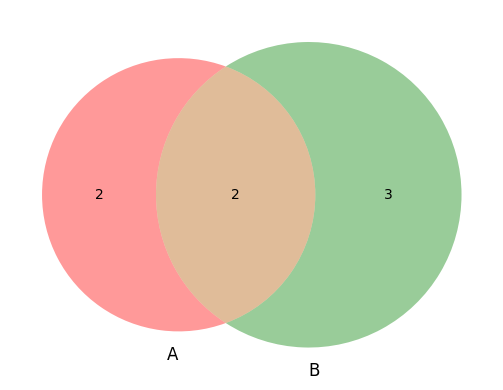

In [27]:
# pip install matplotlib-venn
from matplotlib_venn import venn2

A={1,2,3,4}
B={3,4,5,6,7}

# Venn 다이어그램 그리기
venn=venn2([A, B], ('A', 'B'))

In [16]:
from sympy import FiniteSet

A=FiniteSet('A')
B=FiniteSet('B')

expr=A-B
expr

Complement({A}, {B})

In [22]:
from sympy import Intersection, Complement, UniversalSet

U = UniversalSet

expr2=Intersection(A,Complement(U,B))
expr2.simplify()

Intersection(Complement(UniversalSet, {B}), {A})

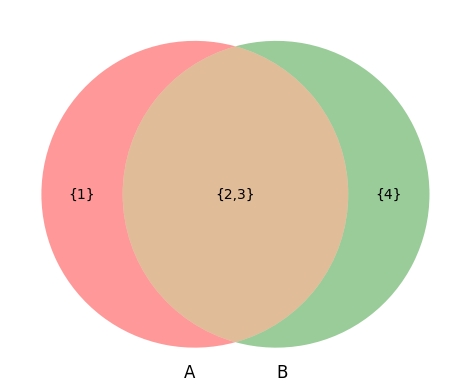

In [6]:
# pip install matplotlib-venn
from matplotlib_venn import venn2
import matplotlib.pyplot as plt 

A={1,2,3}
B={2,3,4}

# Venn 다이어그램 그리기
venn=venn2([A, B], ('A', 'B'))

# 레이블 변경 (예: 백분율로 변경)
venn.get_label_by_id('10').set_text("{1}")  # A 단독 영역
venn.get_label_by_id('01').set_text("{4}")  # B 단독 영역
venn.get_label_by_id('11').set_text("{2,3}")  # A ∩ B 영역

# 그래프 출력
plt.show()

In [13]:
A.union(B)

{1, 2, 3, 4}

C:\Users\hst00\.conda\envs\LAB\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hst00\.conda\envs\LAB\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51665 (\N{HANGUL SYLLABLE JIB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hst00\.conda\envs\LAB\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54633 (\N{HANGUL SYLLABLE HAB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hst00\.conda\envs\LAB\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hst00\.conda\envs\LAB\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  f

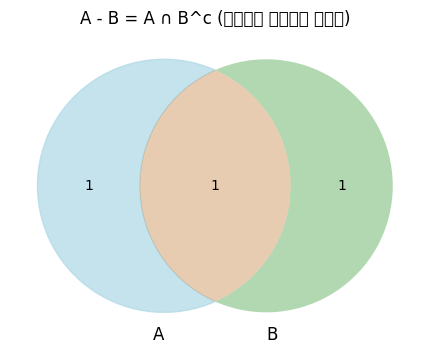

In [15]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_set_difference_and_intersection(A, B):
    """
    A - B = A ∩ B^c (차집합과 여집합의 교집합이 같음을 벤다이어그램으로 시각화)
    """
    plt.figure(figsize=(6,4))
    venn = venn2(subsets=(1, 1, 1), set_labels=('A', 'B'))

    # A - B (A의 원소 중 B에 포함되지 않은 부분)
    venn.get_patch_by_id('10').set_color('lightblue')
    venn.get_patch_by_id('10').set_alpha(0.7)
    
    # B^c (B의 여집합) -> B 영역을 흐리게
    if venn.get_patch_by_id('01'):
        venn.get_patch_by_id('01').set_alpha(0.3)
    if venn.get_patch_by_id('11'):
        venn.get_patch_by_id('11').set_alpha(0.3)

    plt.title("A - B = A ∩ B^c (차집합과 여집합의 교집합)")
    plt.show()

# 차집합과 교집합을 비교하는 벤다이어그램 시각화 실행
plot_set_difference_and_intersection('A', 'B')


In [14]:
A.intersection(B)

{2, 3}

In [5]:
from sympy import symbols, Union, Intersection, Complement, Set, S

# 집합 심볼 정의 (직접 Set 클래스 사용)
A, B = symbols('A B')
A = Set(A)
B = Set(B)

Union(A,B)

Union(Set(A), Set(B))

In [6]:
Intersection(A,B)

Intersection(Set(A), Set(B))

In [7]:
Union(A,B)-Intersection(A,B)

Union(Complement(Set(A), Intersection(Set(A), Set(B))), Complement(Set(B), Intersection(Set(A), Set(B))))

In [11]:
from sympy import symbols, Union, Intersection, Complement

def Fset_01(A, B):
    union_ab = Union(A, B)  # A와 B의 합집합
    intersection_ab = Intersection(A, B)  # A와 B의 교집합
    return Complement(union_ab, intersection_ab)  # 합집합에서 교집합을 제거

# 집합 심볼 정의 (직접 Set 클래스 사용)
A, B = symbols('A B')
A = Set(A)
B = Set(B)

Fset_01(Fset_01(A,B),A)

Union(Complement(Set(A), Complement(Set(A), Intersection(Set(A), Set(B)))), Complement(Set(B), Union(Complement(Set(A), Intersection(Set(A), Set(B))), Intersection(Set(A), Set(B)))))

In [12]:
_.simplify()

Union(Complement(Set(A), Complement(Set(A), Intersection(Set(A), Set(B)))), Complement(Set(B), Union(Complement(Set(A), Intersection(Set(A), Set(B))), Intersection(Set(A), Set(B)))))

In [4]:
# 집합 심볼 정의
A, B = symbols('A B', cls='Set')

Union(A,B)

TypeError: 'str' object is not callable

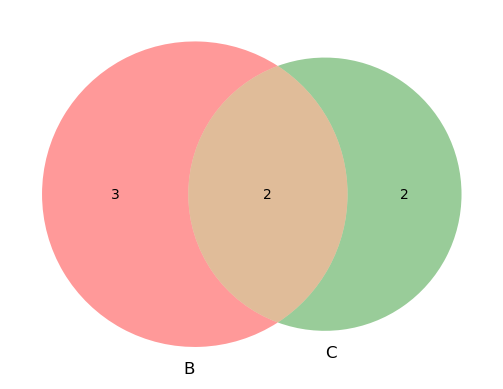

In [7]:
import matplotlib.pyplot as plt

# 집합 정의
B = set([2, 4, 5, 6, 7])
C = set([2, 3, 5, 8])

# Venn 다이어그램 그리기
venn2([B, C], ('B', 'C'))

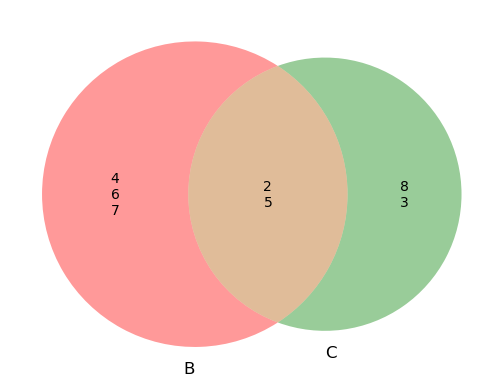

In [6]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# 집합 정의
B = set([2, 4, 5, 6, 7])
C = set([2, 3, 5, 8])

# Venn 다이어그램 그리기
venn = venn2([B, C], ('B', 'C'))

# 각 영역에 원소 표시
# 영역 코드:
# 10: B & ~C
# 01: ~B & C
# 11: B & C

# 원소를 문자열로 변환하여 표시
venn.get_label_by_id('10').set_text('\n'.join(map(str, B - C)))
venn.get_label_by_id('01').set_text('\n'.join(map(str, C - B)))
venn.get_label_by_id('11').set_text('\n'.join(map(str, B & C)))

# 그래프 표시
plt.show()

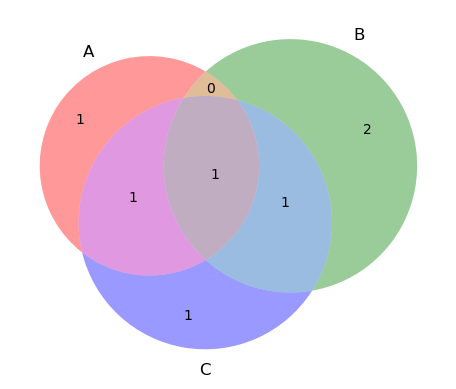

In [3]:
# 벤다이어 그램 그리기
# pip install matplotlib_venn
from matplotlib_venn import venn3
A=set([1,2,3])
B=set([2,4,5,6])
C=set([2,3,5,8])
venn3([A,B,C],['A','B','C'])

## 데카르트 곱

In [1]:
# 코드 실행 상태가 초기화되었으므로 다시 코드 실행

from itertools import product

# A와 B 집합 정의
A = {1, 2, 3}
B = {'a', 'b'}

# 데카르트 곱 (Cartesian Product) 계산
cartesian_product = set(product(A, B))

# 결과 출력
cartesian_product

{(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b'), (3, 'a'), (3, 'b')}

In [14]:
import numpy as np 

A=np.array([1,2,3])
B=np.array(['a','b'])
np.array(np.meshgrid(A,B)).T.reshape(-1,2)

array([['1', 'a'],
       ['1', 'b'],
       ['2', 'a'],
       ['2', 'b'],
       ['3', 'a'],
       ['3', 'b']], dtype='<U11')

In [9]:
A

array({1, 2, 3}, dtype=object)